<a href="https://colab.research.google.com/github/Riddars/BeerProjectForEng/blob/main/BeerProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Глава 1. Описание первоначальной идеи


**Данная идея была заменена, тут представлена работа с данными и предпосылки к смене идеи.**

Цели проекта: Целью нашего проекта является разработка модели машинного обучения, которая способна предсказывать ключевые характеристики пива, такие как крепость, горечь и т.п., на основе данных о рецептах пивоварения. Мы стремимся создать инструмент, который поможет пивоварам и любителям пива более точно понимать и управлять производством пива.

Методы: Для достижения этой цели мы планируем использовать методы машинного обучения и анализа данных. В частности, мы соберем и предобработаем данные о рецептах пива из различных источников, проведем анализ этих данных и создадим модель, которая будет способна предсказывать характеристики пива на основе входных данных о рецептах. Мы также будем оценивать производительность модели и настраивать ее для достижения наилучших результатов.

Актуальность проекта: Пиво является одним из самых популярных алкогольных напитков в мире, и существует огромный спрос на разнообразные стили и вкусы пива. Предсказание характеристик пива на основе рецептов имеет большое практическое применение для пивоваров, ресторанов, баров и даже домашних пивоваров. Наш проект актуален, потому что он может помочь оптимизировать производство, создавать новые уникальные рецепты и улучшать качество пива. Кроме того, это может способствовать развитию индустрии микропивоваренных заводов и пивоваренных стартапов.

Таким образом, наш проект имеет практическую значимость и способен принести пользу как бизнесу, так и пивным энтузиастам. Мы стремимся создать инновационный инструмент, который поможет улучшить производство и разнообразие пива, а также сделать его доступным для всех, кто интересуется этим напитком.



---



Версия - 1.0. (Подготовка данных к работе из датасета - recipeData.csv)

Очистка от экстремальных значений.

Импьютирование пропущенных значений нескольких столбцов.

Кодирование данных.

Нормализация данных.

в результате был получен очищенный датасет: Clear_Dataset_V_1._0.csv



---



Сведения о наборе данных
Контекст
Это набор данных из 75 000 сортов домашнего пива с более чем 176 различными стилями. Записи о пиве сообщаются пользователями и классифицируются в соответствии с одним из 176 различных стилей. В этих рецептах содержится столько же подробностей, сколько предоставил пользователь, но есть как минимум 5 полезных столбцов, в которые были введены данные для каждого из них: Исходная гравитация, Конечная гравитация, ABV, IBU и Цвет

Содержание
recipes.csv - Основные данные для рецептов пива, отправленных пользователями, взятые из Brewer's Friend. Все колонки стандартизированы, за исключением «Priming Method» и «Priming Amount», которые, кажется, просто позволяют пользователям писать все, что они хотят

In [ ]:
!pip install fancyimpute
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from tqdm import tqdm

from sklearn.metrics import r2_score, mean_squared_error
import tensorflow as tf
from fancyimpute import IterativeImputer

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 2.2 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=52a09f3795f860124522f26fca6137485a3c49c50c12c8c09bbb6084078c4238
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=41f9a87315346a109835fa35e0108ccc2686aa81ac1d418d65d2aea3b746541b
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
data_df = pd.read_csv('https://raw.githubusercontent.com/Riddars/BeerProjectForEng/main/recipeData.csv', encoding='ISO-8859-1')

In [ ]:
data_df.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


# Анализ предметной области

1. Начальная плотность (Original Gravity, OG): Она представляет собой концентрацию сахара в сусле перед началом процесса брожения. Это значение используется для определения количества сахара, которое будет превращено в алкоголь и углекислый газ в процессе брожения. Более высокие значения OG указывают на более высокую концентрацию сахара и, как следствие, более высокое содержание алкоголя в конечном продукте.

2. Конечная плотность (Final Gravity, FG): Это показатель концентрации сахара в сусле после брожения. Она используется для определения количества сахара, которое не было превращено в алкоголь и углекислый газ в процессе брожения. Ниже значение FG, тем больше сахара было превращено в алкоголь и углекислый газ, и, как следствие, тем выше содержание алкоголя в конечном продукте.

3. Содержание алкоголя по объему (Alcohol By Volume, ABV): Это процентное содержание алкоголя в готовом пиве, которое рассчитывается на основе значений OG и FG. Этот показатель является важным фактором определения стиля пива, поскольку он влияет на вкус, текстуру и общий характер пива.

4. Международные единицы горечи (International Bitterness Units, IBU): Они измеряют горечь пива, вызванную хмелем, и влияют на вкус и аромат пива. Более высокие значения IBU указывают на более горькое пиво, в то время как более низкие значения указывают на более сладкое или слабое пиво. IBU зависят от количества и типа хмеля, используемого в процессе варки, а также от времени, в течение которого сусло кипит с хмелем.

5. Цветность пива: Она влияет на внешний вид и общий характер пива. Цветность зависит от используемого солода и может варьироваться от очень светлого до очень темного. Цветность также влияет на вкус и аромат пива, поскольку некоторые солода могут придавать пиву сладковатый или ореховый вкус.

6. Объем сусла перед кипячением (BoilSize): Он зависит от размера котла, используемого для варки пива, а также от количества солода и воды, используемых в процессе варки. Больший объем сусла перед кипячением позволяет увеличить объем конечного продукта, но также увеличивает время кипячения и потребляемую энергию.

7. Время кипячения сусла (BoilTime): Оно влияет на вкус и аромат пива, поскольку кипячение способствует выпариваниюvolatile compounds, таких как диацетил и DMS, что позволяет улучшить вкус и аромат пива. Более продолжительное время кипячения может привести к более интенсивному вкусу и аромату, но также увеличивает потребляемую энергию и время варки.

8. Плотность сусла перед кипячением (BoilGravity): Она зависит от количества солода и воды, используемых в процессе варки, и влияет на концентрацию сахара в сусле перед

9. Эффективность процесса варки пива (Efficiency): Это показатель эффективности процесса варки, который зависит от количества солода и воды, используемых в процессе варки, а также от метода варки. Эффективность варки влияет на концентрацию сахара в сусле перед кипячением (BoilGravity) и, как следствие, на содержание алкоголя в конечном продукте. Более высокая эффективность варки позволяет получать больше алкоголя при одинаковом количестве солода и воды.

10. Плотность сусла (в частях воды к частям солода) в процессе затора (MashThickness): Это показатель отношения объема воды к объему солода в процессе затора. Более высокая плотность сусла в процессе затора может способствовать более эффективному извлечению сахара из солода, но также может привести к более затяжному процессу затора и более высокой вискозитети сусла, что может затруднить фильтрацию и переливание сусла.

11. Единица измерения используемая для измерения сахара (SugarScale): Это показатель, который используется для измерения концентрации сахара в сусле. Существуют различные единицы измерения, такие как градусы Плотности (°P), градусы Баллин (°B), или градусы Специфической плотности (SG). Этот показатель влияет на определение начальной плотности (OG) и конечной плотности (FG) сусла, а также на расчет содержания алкоголя по объему (ABV).

12. Метод варки пива (BrewMethod): Это показатель, который определяет способ варки пива, например, варка напособом бильхуа (decoction mashing) или варка с применением одного или нескольких затираний (infusion mashing). Метод варки влияет на эффективность варки, плотность сусла перед кипячением (BoilGravity), а также на вкус и аромат конечного продукта.

13. Скорость добавления дрожжей в сусло (PitchRate): Это показатель, который определяет количество дрожжей, добавленных в сусло на единицу объема. Более высокая скорость добавления дрожжей позволяет начать процесс брожения раньше и уменьшить риск заражения сусла нежелательными микроорганизмами, но также может привести к более затяжному процессу брожения и более высокому потреблению сахара дрожжами.

14. Температура брожения (PrimaryTemp): Это показатель, который определяет температуру, при которой происходит процесс первичного брожения. Температура брожения влияет на скорость и эффективность процесса брожения, а также на вкус и аромат конечного продукта. Более высокие температуры брожения могут привести к более быстрому процессу брожения, но также могут привести к появлению нежелательных вкусов и ароматов, таких как fruity esters и phenolic compounds.

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73861 entries, 0 to 73860
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BeerID         73861 non-null  int64  
 1   Name           73860 non-null  object 
 2   URL            73861 non-null  object 
 3   Style          73265 non-null  object 
 4   StyleID        73861 non-null  int64  
 5   Size(L)        73861 non-null  float64
 6   OG             73861 non-null  float64
 7   FG             73861 non-null  float64
 8   ABV            73861 non-null  float64
 9   IBU            73861 non-null  float64
 10  Color          73861 non-null  float64
 11  BoilSize       73861 non-null  float64
 12  BoilTime       73861 non-null  int64  
 13  BoilGravity    70871 non-null  float64
 14  Efficiency     73861 non-null  float64
 15  MashThickness  43997 non-null  float64
 16  SugarScale     73861 non-null  object 
 17  BrewMethod     73861 non-null  object 
 18  PitchR

# Работа с данными

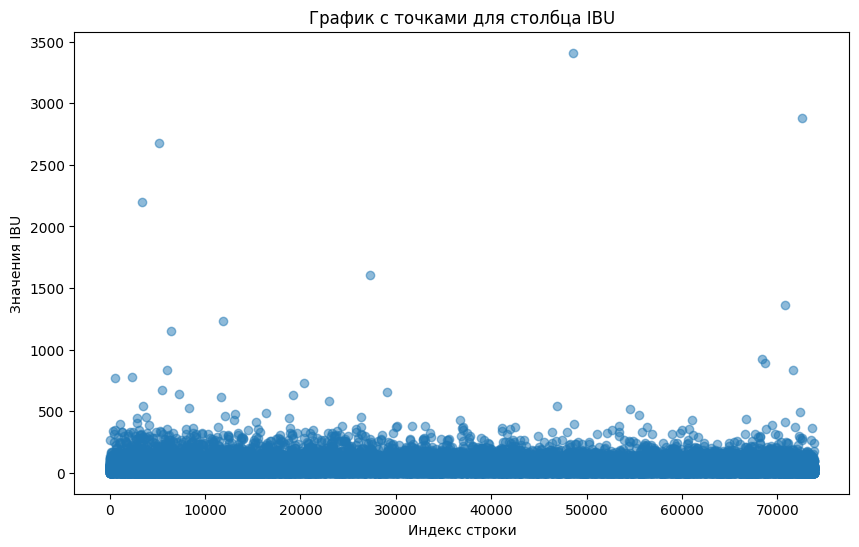

In [ ]:
# Заменяем 'IBU' на имя нужного столбца
ibu_values = data_df['IBU']

plt.figure(figsize=(10, 6))
plt.scatter(range(len(ibu_values)), ibu_values, alpha=0.5)
plt.xlabel('Индекс строки')
plt.ylabel('Значения IBU')
plt.title('График с точками для столбца IBU')
plt.show()

In [ ]:
mean_ibu = data_df['IBU'].mean()
variance_ibu = data_df['IBU'].var()

print(f"Среднее значение IBU: {mean_ibu}")
print(f"Дисперсия IBU: {variance_ibu}")

Среднее значение IBU: 44.27618621464642
Дисперсия IBU: 1844.3166280448795


**Анализируем разброс данных.**

In [ ]:
# Заменяем 'IBU' на имя столбца
ibu_values = data_df['IBU']

# Определяем интервалы
intervals = [0, 200, 500, float('inf')]  # Диапазоны могут быть разными в зависимости от столбца. Ставим вручную.

# Гистограмма для подсчета частоты значений в каждом диапазоне
hist, bin_edges = np.histogram(ibu_values, bins=intervals)

# Выводим результаты
for i in range(len(hist)):
    if i == len(hist) - 1:
        print(f'Значения IBU выше {intervals[i]}: {hist[i]}')
    else:
        print(f'Значения IBU в диапазоне {intervals[i]}-{intervals[i + 1]}: {hist[i]}')


Значения IBU в диапазоне 0-200: 73356
Значения IBU в диапазоне 200-500: 480
Значения IBU выше 500: 25


# Удаляем выбросы

Проанализировали аномальные значения для каждого столбца. Уменьшение дисперсии даёт понять что результат пошёл на пользу.

In [ ]:
data_df = data_df[(data_df['IBU'] <= 200) &
                  (data_df['ABV'] <= 10) &
                  (data_df['FG'] <= 5) &
                  (data_df['Size(L)'] <= 2000) &
                  (data_df['BoilSize'] <= 1000) &
                  (data_df['BoilTime'] <= 125) &
                  (data_df['BoilGravity'].le(15) | data_df['BoilGravity'].isnull()) &
                  (data_df['MashThickness'].le(9) | data_df['MashThickness'].isnull())]

In [ ]:
# Удаляем строки с незаполнеными Style и Name (их не много так что не вдумывайся в смысл)
data_df = data_df.dropna(subset=['Style', 'Name'])

# Заполнение пропущенных значений с помощью импьютации

In [ ]:
# Список столбцов
columns_to_impute = ['MashThickness', 'PitchRate', 'PrimaryTemp', 'BoilGravity']

mice_imputer = IterativeImputer()

df = data_df.copy()
# Применение импьютации к выбранным столбцам
df[columns_to_impute] = mice_imputer.fit_transform(data_df[columns_to_impute])

# Проверка эффективности импьютации
for column in columns_to_impute:
    original_mean = data_df[column].mean()
    original_median = data_df[column].median()

    imputed_mean = df[column].mean()
    imputed_median = np.median(df[column])


    print(f"Статистика для '{column}' до импьютации:")
    print(f"Среднее значение: {original_mean}")
    print(f"Медиана: {original_median}\n")
    print(f"Статистика для '{column}' после импьутации:")
    print(f"Среднее значение: {imputed_mean}")
    print(f"Медиана: {imputed_median}\n")
data_df = df.copy()

Статистика для 'MashThickness' до импьютации:
Среднее значение: 2.0620246416953925
Медиана: 1.5

Статистика для 'MashThickness' после импьутации:
Среднее значение: 2.060712501649549
Медиана: 2.0481188573432707

Статистика для 'PitchRate' до импьютации:
Среднее значение: 0.7420168196187963
Медиана: 0.75

Статистика для 'PitchRate' после импьутации:
Среднее значение: 0.736994698170454
Медиана: 0.7368876828305854

Статистика для 'PrimaryTemp' до импьютации:
Среднее значение: 19.145367194280283
Медиана: 20.0

Статистика для 'PrimaryTemp' после импьутации:
Среднее значение: 19.138235493528185
Медиана: 19.14487797520406

Статистика для 'BoilGravity' до импьютации:
Среднее значение: 1.2511848685392588
Медиана: 1.047

Статистика для 'BoilGravity' после импьутации:
Среднее значение: 1.2511090306084425
Медиана: 1.047



Видно, что значения для каждого из параметров ('MashThickness', 'PitchRate', 'PrimaryTemp', 'BoilGravity') остались неизменными после импьютации. Импьютация данных не привела к изменению значений или ошибкам в данных, что нам и нужно.

In [ ]:
missing_values = data_df.isnull().sum()
print(missing_values)

BeerID               0
Name                 0
URL                  0
Style                0
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity          0
Efficiency           0
MashThickness        0
SugarScale           0
BrewMethod           0
PitchRate            0
PrimaryTemp          0
PrimingMethod    62878
PrimingAmount    64769
UserId           47197
dtype: int64


(69372, 23)


<ipython-input-12-365ad99b258c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_df.corr(), cmap='viridis', yticklabels=True)


<Axes: >

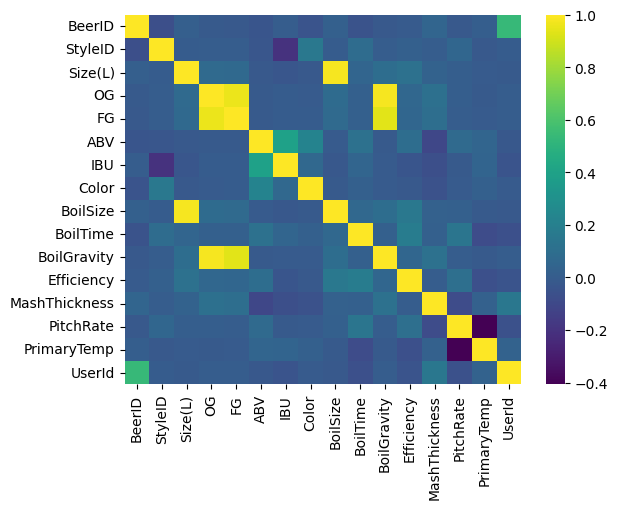

In [ ]:
# посмотрим корреляцию столбцов с числовыми значениями
print(data_df.shape)
sns.heatmap(data_df.corr(), cmap='viridis', yticklabels=True)

Исходя из матрицы корреляций, можно сделать следующие выводы:


Показатели OG (оригинальная плотность) и FG (конечная плотность) имеют высокую положительную корреляцию между собой (0.959), что означает, что они сильно связаны друг с другом.

Аналогично, ABV (содержание алкоголя) имеет относительно высокую корреляцию как с OG (0.978), так и с FG (0.937).

Кроме того, IBU (горечь пива) демонстрирует умеренную положительную корреляцию с ABV (0.395) и Color (0.224), что может указывать на взаимосвязь между этими характеристиками пива.

Некоторые другие столбцы такие как Size(L), BoilSize, BoilTime также имеют некоторую корреляцию между собой.

# Encoding

In [ ]:
le = LabelEncoder()
text_data_features = ['SugarScale', 'BrewMethod']
l3 = []; l4 = [];
print('Label Encoder Transformation')
for i in tqdm(text_data_features):
    data_df[i] = le.fit_transform(data_df[i])
    l3.append(list(data_df[i].unique())); l4.append(list(le.inverse_transform(data_df[i].unique())))
    print(i,' : ',data_df[i].unique(),' = ',le.inverse_transform(data_df[i].unique()))

Label Encoder Transformation


100%|██████████| 2/2 [00:00<00:00, 23.78it/s]

SugarScale  :  [1 0]  =  ['Specific Gravity' 'Plato']
BrewMethod  :  [0 3 1 2]  =  ['All Grain' 'extract' 'BIAB' 'Partial Mash']


# Нормализация числовых зачений (Кроме закодированных)

---



In [ ]:
# Ваши данные и столбцы для нормализации
columns_to_normalize = ['Size(L)', 'OG', 'FG', 'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency', 'MashThickness', 'PitchRate', 'PrimaryTemp']

# Получите минимальные и максимальные значения для каждого столбца до нормализации
min_values_before = data_df[columns_to_normalize].min()
max_values_before = data_df[columns_to_normalize].max()

print("Минимальные значения до нормализации:")
print(min_values_before)

print("Максимальные значения до нормализации:")
print(max_values_before)

Минимальные значения до нормализации:
Size(L)           1.000000
OG                1.000000
FG                0.425441
ABV               0.000000
IBU               0.000000
Color             0.000000
BoilSize          1.000000
BoilTime          0.000000
BoilGravity       0.000000
Efficiency        0.000000
MashThickness     0.000000
PitchRate        -1.288560
PrimaryTemp     -17.780000
dtype: float64
Максимальные значения до нормализации:
Size(L)          1400.00000
OG                 21.63110
FG                  4.99375
ABV                10.00000
IBU               200.00000
Color             186.00000
BoilSize         1000.00000
BoilTime          125.00000
BoilGravity        15.00000
Efficiency        100.00000
MashThickness       9.00000
PitchRate           2.00000
PrimaryTemp       114.00000
dtype: float64


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69372 entries, 0 to 73860
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BeerID         69372 non-null  int64  
 1   Name           69372 non-null  object 
 2   URL            69372 non-null  object 
 3   Style          69372 non-null  object 
 4   StyleID        69372 non-null  int64  
 5   Size(L)        69372 non-null  float64
 6   OG             69372 non-null  float64
 7   FG             69372 non-null  float64
 8   ABV            69372 non-null  float64
 9   IBU            69372 non-null  float64
 10  Color          69372 non-null  float64
 11  BoilSize       69372 non-null  float64
 12  BoilTime       69372 non-null  int64  
 13  BoilGravity    69372 non-null  float64
 14  Efficiency     69372 non-null  float64
 15  MashThickness  69372 non-null  float64
 16  SugarScale     69372 non-null  int64  
 17  BrewMethod     69372 non-null  int64  
 18  PitchR

# Парсинг
следующий этап в реализации первой идеи

После изучния предметной области стало очевидно что датасет содержит очень мало начальных характеристик, поэтому было принято решение запарсить дополнительные данные среди которых есть данные о дрожжах, хмеле, солоде и так далее.

Данные парсились с этого сайта - https://www.brewersfriend.com/homebrew-recipes/

Основная проблема была в том, что данные можно было запарсить только перейдя по определённому рецепту. Это создавало огромное количество запросов к сайту.

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import os
import re
import json

Для начала попробуем запарсить комментарии крецептам, это может пригодиться для составления мнения людей о рецептах.


В целом тут просто представлен наш первый опыт парсинга. Не нужно запускать этот код, он будет выполняться очень долго.

Ближе к дедлайну мы заметили что не учли в этом коде задержки между запросами, что привело к тому, что часть данных была утеряна, однако опыт был удачным и определённое количество комментариев мы запарсили.

То что получилось запарсить вы можете найти в нашем GitHub под названием - recipe_comments.json

In [ ]:
# словарь для хранения комментариев по ID рецепта
recipe_comments = {}

# Перебираем каждую строку в датасете
for index, row in data_df.iterrows():
    recipe_id = row["BeerID"]
    url = row["URL"]
    full_url = "https://www.brewersfriend.com" + url
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'}
    r = requests.get(full_url, headers=headers)

    if r.status_code == 200:
        soup = bs(r.text, "lxml")
        vacancies_names = soup.find_all('table', class_="bf_recipe_comment")

        comments_for_recipe = []  # Создаём список для хранения комментариев для рецепта

        for item in vacancies_names:
            comment_text = re.search(r'at \d{2}:\d{2}(?:am|pm)(.*)', item.text)
            if comment_text:
                clean_text = comment_text.group(1).strip()
                comments_for_recipe.append(clean_text)

        # Сохранем промежуточный результат
        recipe_comments[recipe_id] = comments_for_recipe

        # Сохраняем словарь в файл после каждого обновления
        with open('recipe_comments.json', 'w') as file:
            json.dump(recipe_comments, file)

KeyboardInterrupt: 

**Пробуем запарсить все возможные данные только для 1 рецепта**

In [ ]:
# Загрузка страницы
url = 'https://www.brewersfriend.com/homebrew/recipe/view/1633/vanilla-cream-ale'
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)
soup = bs(response.content, 'html.parser')

# Нахождение всех таблиц на странице
tables = soup.find_all('table')

# Создание списка для хранения DataFrame каждой таблицы
dataframes = []

# Парсинг каждой таблицы
for table in tables:
    # Получаем классы таблицы
    table_classes = table.get('class')

    # Пропустим таблицу, если она содержит только одну строку (часто это не таблица с данными)
    if len(table.find_all('tr')) <= 1:
        continue

    # Используем метод pandas read_html для извлечения данных из таблицы
    df = pd.read_html(str(table))[0]
    dataframes.append(df)

# Вывод результатов
for idx, df in enumerate(dataframes):
    print(f"DataFrame {idx + 1}:")
    print(df)
    print('\n')

DataFrame 1:
               Amount                          Fermentable  \
0             5.25 lb                American - Pale 2-Row   
1                2 lb               American - White Wheat   
2                2 lb                American - Pale 6-Row   
3             0.50 lb                          Flaked Corn   
4             0.50 lb     American - Caramel / Crystal 20L   
5             0.50 lb  American - Carapils (Dextrine Malt)   
6             0.25 lb                        Flaked Barley   
7             0.75 lb     Honey(late boil kettle addition)   
8  11.75 lbs / $ 0.00                   11.75 lbs / $ 0.00   

                 Cost                 PPG                  °L  \
0                 NaN                  37                 1.8   
1                 NaN                  40                 2.8   
2                 NaN                  35                 1.8   
3                 NaN                  40                 0.5   
4                 NaN                  35

Видим что данных достаточно много, попробуем представить несколько таблиц в более понятном виде.

In [ ]:
dataframes[1]

,Amount,Variety,Cost,Type,AA,Use,Time,IBU,Bill %
0,0.50 oz,Cascade,NaN,Pellet,6.2,Boil,60 min,11.42,33.3%
1,0.50 oz,Cascade,NaN,Pellet,6.2,Boil,20 min,6.92,33.3%
2,0.50 oz,saaz,NaN,Pellet,3,Boil,5 min,1.1,33.3%
3,1.50 oz / $ 0.00,1.50 oz / $ 0.00,1.50 oz / $ 0.00,1.50 oz / $ 0.00,1.50 oz / $ 0.00,1.50 oz / $ 0.00,1.50 oz / $ 0.00,1.50 oz / $ 0.00,1.50 oz / $ 0.00


In [ ]:
dataframes[0]

,Amount,Fermentable,Cost,PPG,°L,Bill %
0,5.25 lb,American - Pale 2-Row,NaN,37,1.8,44.7%
1,2 lb,American - White Wheat,NaN,40,2.8,17%
2,2 lb,American - Pale 6-Row,NaN,35,1.8,17%
3,0.50 lb,Flaked Corn,NaN,40,0.5,4.3%
4,0.50 lb,American - Caramel / Crystal 20L,NaN,35,20,4.3%
5,0.50 lb,American - Carapils (Dextrine Malt),NaN,33,1.8,4.3%
6,0.25 lb,Flaked Barley,NaN,32,2.2,2.1%
7,0.75 lb,Honey(late boil kettle addition),NaN,42,2,6.4%
8,11.75 lbs / $ 0.00,11.75 lbs / $ 0.00,11.75 lbs / $ 0.00,11.75 lbs / $ 0.00,11.75 lbs / $ 0.00,11.75 lbs / $ 0.00


 Очевидно, что объединение такого большого количества таблиц с одной единственной строкой в датасете для обучения моделей является трудоемким заданием.

Мы столкнулись с трудностью в поиске способа интеграции всех этих таблиц в одну строку, поскольку создание базы данных было нецелесообразным.

Наилучшим на тот момент решением, которое приходило в голову, было преобразование всех таблиц в одну строку и их соединение с основным датасетом. Однако у этого подхода был один значительный недостаток, с которым мы так и не смогли справиться.

Все таблицы, относящиеся к каждому рецепту, имели разное количество строк, что затрудняло создание единого формата для преобразования всех таблиц в однострочные датасеты и последующее объединение с основным датасетом.

Кроме того, данные в таблицах представлялись в разных единицах измерения. Это не являлось неразрешимой проблемой, однако создавало серьезные трудности и замедляло ход нашего проекта.



---



Ниже приведён код где мы парсили данные к рецептам и переводили их в однострочные датафреймы соединяя с основным датасетом.

Этот код рабочий, но является **черновым**, так что **не нужно его запускать**

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import itertools
import time  # Для учета задержки между запросами

row_limit = 69372  # Лимит обработки строк
row_count = 0  # переменная для отслеживания количества обработанных строк

# Создаем итератор, начинающийся с 20 строки. Был необходим для обхода блокировки на сайте. Не вдумывайтесь, просто поверьте :)
data_iter = itertools.islice(data_df.iterrows(), 19, None)

for index, row in data_iter:
    if row_count >= row_limit:
        break  # прерываем цикл если количество обработанных строк достигло лимита
    url = row["URL"]
    full_url = "https://www.brewersfriend.com" + url
    headers = {'User-Agent': 'Mozilla/5.0'}
    try:
        response = requests.get(full_url, headers=headers)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            temp_dataframes = []  # временное хранение таблиц для каждой строки
            for table in soup.find_all('table'):
                if len(table.find_all('tr')) <= 1:
                    continue

                df = pd.read_html(str(table), flavor='html5lib')[0]
                # Добавляем столбец, содержащий BeerID из основного датафрейма
                df['BeerID'] = row['BeerID']
                temp_dataframes.append(df)  # сохраняем каждую таблицу во временном списке

            # Проходим по всем сохраненным временным датафреймам
            for i, temp_df in enumerate(temp_dataframes):
                tr = []
                tr_out_cols = []
                for c in temp_df.columns:
                    tr_out_cols += list(c + '_' + str(m) for m in range(1, temp_df.shape[0] + 1))
                    tr += temp_df[c].to_list()
                ltf = pd.DataFrame([tr], columns=tr_out_cols)
                # Добавляем однострочный датафрейм в основной датасет соответствующей строкой
                data_df.loc[index + i, ltf.columns] = ltf.values[0]

        row_count += 1  # увеличиваем счетчик обработанных строк
    except Exception as e:
        print(e)
        continue

    time.sleep(20)  # Добавляем задержку в 20 секунду между запросами
    requests.get("https://colab.research.google.com/")

# Итог

**Отказ от реализации идеи и предпосылки**

Цели проекта: Наша цель заключается в разработке модели машинного обучения для прогнозирования основных характеристик пива на основе данных о рецептах пивоварения. Мы стремимся создать инструмент, способный помочь пивоварням и любителям пива более точно понимать и управлять производством пива.

Предпосылки к смене идеи: После работы с данными мы получили некорректно объединенный датасет с дескрипторами, содержащий данные в различных единицах измерения и другие проблемы. Анализируя результаты, мы обнаружили, что **дескрипторы не содержали информации о начальных характеристиках сырья, которые были фундаментальными для наших целей**. Имеющиеся данные ограничивались названиями и концентрациями компонентов, что **не позволяло достичь поставленных задач**.

Отказ от реализации идеи:

Главная причина отказа **состоит в отсутствии начальных характеристик сырья, необходимых для предсказания конечных параметров.**

Другие причины включают сложности при объединении дескрипторов с основным датасетом и обработке этих значений.

Итак, на основании вышеуказанных причин, мы приняли решение отказаться от дальнейшей работы с этим датасетом, так как он не соответствовал требованиям и целям нашего проекта.

Несмотря на сложности и отказ от основной идеи, наш опыт включал обширное изучение различных технологий работы с данными, методов парсинга, а также решение множества других задач.

Мы погрузились в изучение различных инструментов и техник обработки данных, включая веб-парсинг, объединение разнородных датасетов, преобразование единиц измерения и многие другие аспекты анализа данных.

Этот опыт позволил нам углубить знания в области обработки и анализа данных.

# Глава 2. Описание финальной идеи.

**Основная идея проекта:**


Проект заключается в реализации системы машинного обучения, которая анализирует данные о пиве и классифицирует его стили на основе различных характеристик, таких как крепость (ABV), показатели горечи (IBU) и дополнительные сенсорные атрибуты (например, сладость, кислотность, фруктовость и другие).

Кроме того, проект включает интерактивный элемент, позволяющий пользователям вводить значения характеристик и получать предсказания стиля пива, а также информацию о ближайшем рецепте из набора данных.

Цели проекта:


1.   Анализ и классификация стилей пива по характеристикам.
2.   Оценка важности отдельных характеристик для классификации стилей пива.
3.   Предоставление инструмента для пивоваров и любителей пива для исследования влияния различных атрибутов на стиль пива.
4.   Создание интерактивного опыта для пользователя с возможностью предсказания стиля пива и поиска ближайших рецептов в наборе данных.



Полезность проекта:

Пивоварням, которые могут использовать эту систему для разработки новых рецептов пива или адаптации существующих, чтобы соответствовать определенным стилям.

Ритейлерам и дистрибьюторам для классификации и каталогизации пива в их ассортименте.

Любителям пива и приложениям рекомендаций, которые могут использовать этот инструмент для поиска пива с желаемыми характеристиками.

Аналитикам и исследователям пивной индустрии для изучения рыночных тенденций и предпочтений потребителей.

В целом, проект представляет собой комплексный инструмент для работы с данными о пиве, который может быть использован для различных целей, включая классификацию, анализ и разработку пива.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from sklearn.neighbors import NearestNeighbors
!pip install lazypredict
import matplotlib.pyplot as plt

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/Riddars/BeerProjectForEng/main/beer_data_set.csv', encoding='ISO-8859-1')

# Работа с данными

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         5556 non-null   object 
 1   key          5558 non-null   int64  
 2   Style        5558 non-null   object 
 3   Style Key    5558 non-null   int64  
 4   Brewery      5558 non-null   object 
 5   Description  5558 non-null   object 
 6   ABV          5558 non-null   float64
 7   Ave Rating   5558 non-null   float64
 8   Min IBU      5558 non-null   int64  
 9   Max IBU      5558 non-null   int64  
 10  Astringency  5558 non-null   int64  
 11  Body         5558 non-null   int64  
 12  Alcohol      5558 non-null   int64  
 13  Bitter       5558 non-null   int64  
 14  Sweet        5558 non-null   int64  
 15  Sour         5558 non-null   int64  
 16  Salty        5558 non-null   int64  
 17  Fruits       5558 non-null   int64  
 18  Hoppy        5558 non-null   int64  
 19  Spices

In [ ]:
df2.isnull().sum()

Name           2
key            0
Style          0
Style Key      0
Brewery        0
Description    0
ABV            0
Ave Rating     0
Min IBU        0
Max IBU        0
Astringency    0
Body           0
Alcohol        0
Bitter         0
Sweet          0
Sour           0
Salty          0
Fruits         0
Hoppy          0
Spices         0
Malty          0
dtype: int64

In [ ]:
df2 = df2.dropna()

In [ ]:
df2.head()

,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,Amber,251,Altbier,8,Alaskan Brewing Co.,"Notes:Richly malty and long on the palate, wit...",5.3,3.65,25,50,...,32,9,47,74,33,0,33,57,8,111
1,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.90,25,50,...,57,18,33,55,16,0,24,35,12,84
2,Long Trail Ale,253,Altbier,8,Long Trail Brewing Co.,Notes:Long Trail Ale is a full-bodied amber al...,5.0,3.58,25,50,...,37,6,42,43,11,0,10,54,4,62
3,Doppelsticke,254,Altbier,8,Uerige ObergÃ¤rige Hausbrauerei,Notes:,8.5,4.15,25,50,...,55,31,47,101,18,1,49,40,16,119
4,Scurry,255,Altbier,8,Off Color Brewing,Notes:Just cause it's dark and German doesn't ...,5.3,3.67,25,50,...,69,10,63,120,14,0,19,36,15,218


Необходимо провести анализ количества примеров для каждого класса стиля пива, чтобы выявить дисбаланс и его влияние на обучение модели.

In [ ]:
# Подсчет количества примеров для каждого класса стиля пива
beer_style_counts = df2['Style'].value_counts()
beer_style_counts

Altbier                           50
Lager - MÃ¤rzen / Oktoberfest     50
Red Ale - Imperial                50
Red Ale - American Amber / Red    50
Quadrupel (Quad)                  50
                                  ..
Sour - Flanders Oud Bruin         49
Sour - Flanders Red Ale           49
Lager - European Pale             49
Sour - Gose                       49
Lambic - Faro                     16
Name: Style, Length: 112, dtype: int64

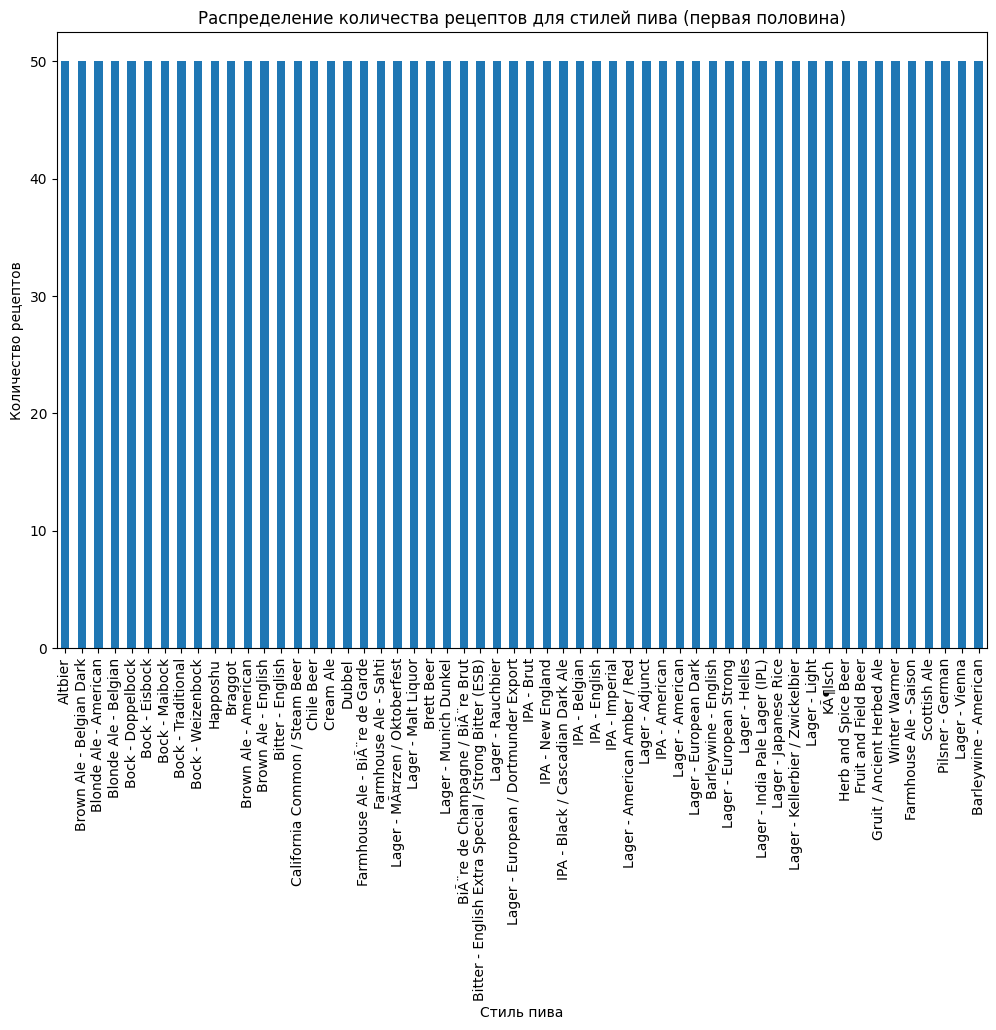

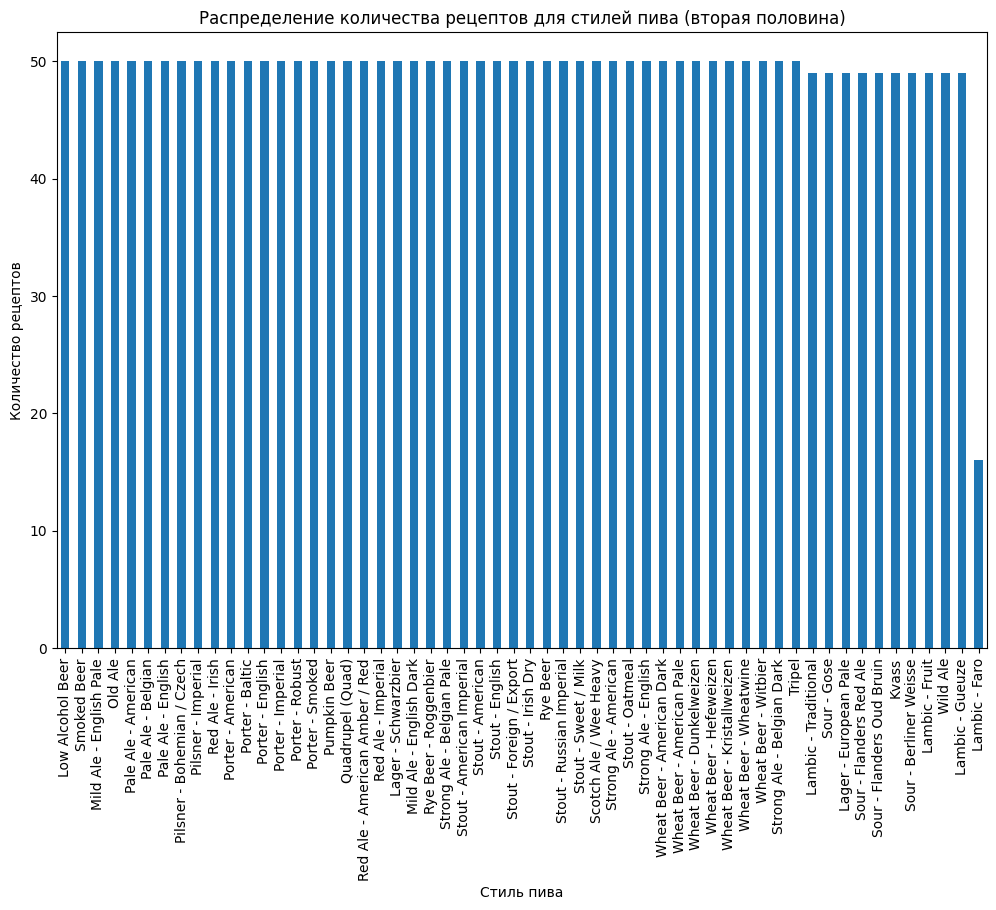

In [ ]:
# Разделение стилей на две части
beer_style_counts_sorted = beer_style_counts.sort_values(ascending=False)
first_half_styles = beer_style_counts_sorted[:len(beer_style_counts_sorted)//2]
second_half_styles = beer_style_counts_sorted[len(beer_style_counts_sorted)//2:]

# Создание первого графика
plt.figure(figsize=(12, 8))
first_half_styles.plot(kind='bar')
plt.title('Распределение количества рецептов для стилей пива (первая половина)')
plt.xlabel('Стиль пива')
plt.ylabel('Количество рецептов')
plt.show()

# Создание второго графика
plt.figure(figsize=(12, 8))
second_half_styles.plot(kind='bar')
plt.title('Распределение количества рецептов для стилей пива (вторая половина)')
plt.xlabel('Стиль пива')
plt.ylabel('Количество рецептов')
plt.show()

<ipython-input-30-3df7597e6f05>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


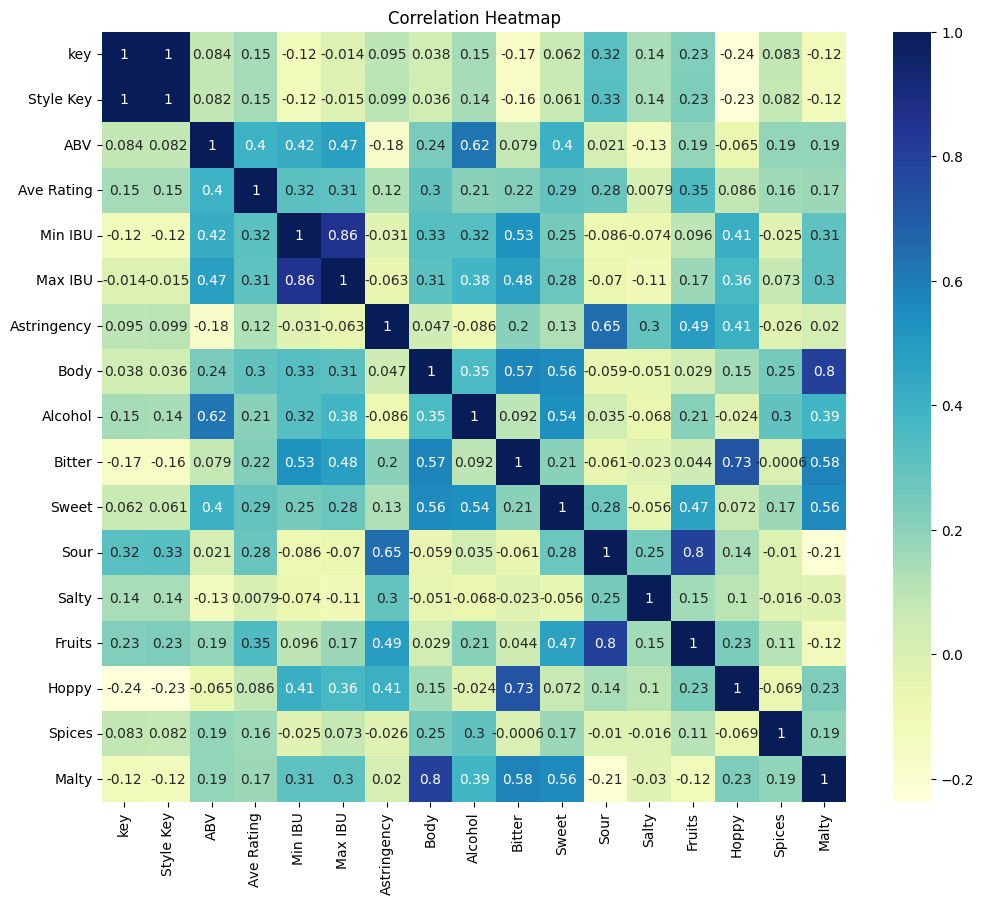

In [ ]:
data = df2.copy()

# Вычисление матрицы корреляций
correlation_matrix = data.corr()

# Создание тепловой карты корреляций
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap')
plt.show()

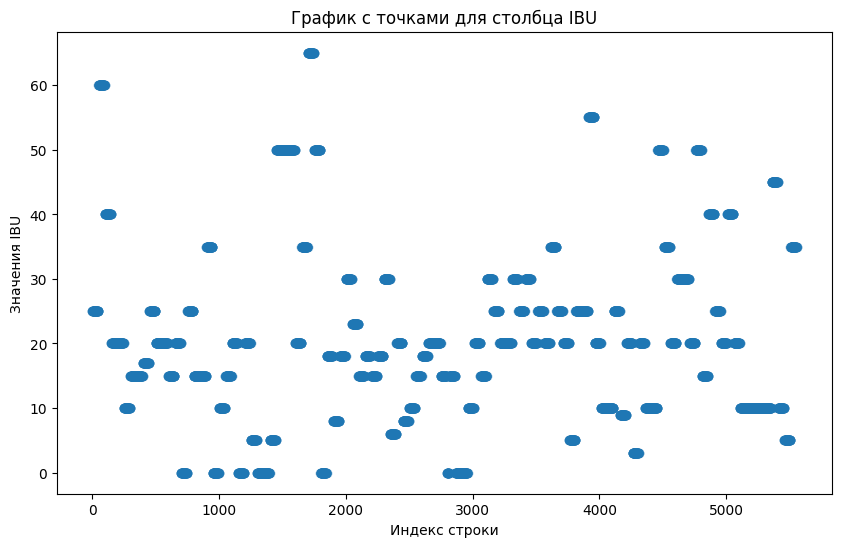

In [ ]:
# Замените 'IBU' на имя вашего столбца
ibu_values = df2['Min IBU']

# Создайте график с точками
plt.figure(figsize=(10, 6))
plt.scatter(range(len(ibu_values)), ibu_values, alpha=0.5)
plt.xlabel('Индекс строки')
plt.ylabel('Значения IBU')
plt.title('График с точками для столбца IBU')
plt.show()

 90%|████████▉ | 26/29 [01:00<00:03,  1.26s/it]

Выходные данные были обрезаны до нескольких последних строк (5000).
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

100%|██████████| 29/29 [01:12<00:00,  2.50s/it]


                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RandomForestClassifier             0.85               0.85    None      0.85   
ExtraTreesClassifier               0.85               0.85    None      0.85   
BaggingClassifier                  0.84               0.84    None      0.83   
GaussianNB                         0.82               0.82    None      0.82   
DecisionTreeClassifier             0.80               0.79    None      0.80   
LogisticRegression                 0.68               0.68    None      0.67   
QuadraticDiscriminantAnalysis      0.66               0.65    None      0.63   
SVC                                0.63               0.64    None      0.62   
CalibratedClassifierCV             0.60               0.61    None      0.58   
LinearSVC                          0.59               0.60    None      0.57   
KNeighborsClassifier               0.58 

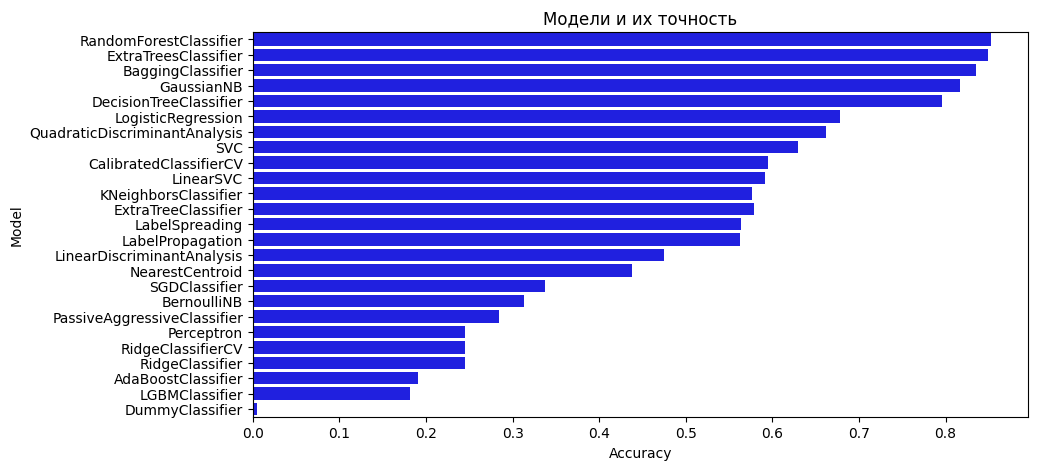

In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

df = pd.DataFrame(df2)

# Удаление ненужных столбцов
df = df.drop(['Name', 'key', 'Brewery', 'Description', 'Style', 'Ave Rating'], axis=1)

# Разделение данных на признаки и целевую переменную
X = df.drop('Style Key', axis=1)
y = df['Style Key']

# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Инициализация LazyClassifier
clf = LazyClassifier(predictions=True)

# Обучение модели
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Вывод точности каждой модели
print(models)

# Вывод графиков
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x='Accuracy', y=models.index, data=models, color='b')
plt.title('Модели и их точность')
plt.show()

# Вывод важности признаков
for name, model in models.iterrows():
    if hasattr(model, 'feature_importances_'):
        feature_imp = model.feature_importances_
        feat = X.columns
        sns.barplot(x=feature_imp, y=feat)
        plt.title(f'Важность признаков для модели {name}')
        plt.show()

Итак, на основе предоставленных данных, RandomForestClassifier и ExtraTreesClassifier можно рассматривать как наиболее эффективные модели с высокими показателями точности, сбалансированной точности и F1-меры.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Создание экземпляра RandomForestClassifier
rf = RandomForestClassifier()

df = pd.DataFrame(df2)

# Удаление ненужных столбцов
df = df.drop(['Name', 'key', 'Brewery', 'Description', 'Style', 'Ave Rating'], axis=1)

# Разделение данных на признаки и целевую переменную
X = df.drop('Style Key', axis=1)
y = df['Style Key']


# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Задание сетки параметров для перебора
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Инициализация RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Поиск лучших параметров
random_search.fit(X_train, y_train)

# Вывод лучших параметров
print(random_search.best_params_)

# Получение модели с лучшими параметрами
best_rf_model = random_search.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': True}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Удаление ненужных столбцов
df = df2.drop(['Name', 'key', 'Brewery', 'Description', 'Style', 'Ave Rating'], axis=1)

X = df.drop('Style Key', axis=1)
y = df['Style Key']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели с оптимальными параметрами
best_rf_model = RandomForestClassifier(n_estimators=200,
                                      min_samples_split=2,
                                      min_samples_leaf=1,
                                      max_features='sqrt',  # явно указываем max_features='sqrt'
                                      max_depth=40,
                                      bootstrap=True)

best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_test)

# Вычисление метрик
accuracy = accuracy_score(y_test, y_pred)
precision_micro = precision_score(y_test, y_pred, average='micro')  # Микроусреднение precision
recall_micro = recall_score(y_test, y_pred, average='micro')  # Микроусреднение recall
f1_micro = f1_score(y_test, y_pred, average='micro')  # Микроусреднение F1-score
precision_macro = precision_score(y_test, y_pred, average='macro')  # Макроусреднение precision
recall_macro = recall_score(y_test, y_pred, average='macro')  # Макроусреднение recall
f1_macro = f1_score(y_test, y_pred, average='macro')  # Макроусреднение F1-score
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)  # Классификационный отчет

print("Accuracy:", accuracy)
print("Micro-average Precision:", precision_micro)
print("Micro-average Recall:", recall_micro)
print("Micro-average F1 Score:", f1_micro)
print("Macro-average Precision:", precision_macro)
print("Macro-average Recall:", recall_macro)
print("Macro-average F1 Score:", f1_macro)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.841726618705036
Micro-average Precision: 0.841726618705036
Micro-average Recall: 0.841726618705036
Micro-average F1 Score: 0.841726618705036
Macro-average Precision: 0.8374861993165565
Macro-average Recall: 0.8354890178682196
Macro-average F1 Score: 0.8297668770615072
Confusion Matrix:
[[15  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0  9 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  9]]
Classification Report:
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        15
           3       0.93      1.00      0.96        13
           4       0.90      1.00      0.95         9
           5       0.56      0.45      0.50        11
           6       0.71      0.83      0.77         6
           8       0.91      0.83      0.87        12
           9       0.78      0.88      0.82         8
          10       0.75      0.75      0.75        12
          11       0.50      0.33  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

1. Accuracy (Точность):

Отвечает за долю правильных предсказаний от общего числа предсказаний.
Результат 0.8318 означает, что около 83% всех предсказаний верны.
2. Micro-average Precision (Микро-усредненная точность):

Эта метрика учитывает общие истинно-положительные, ложно-положительные и ложно-отрицательные результаты для всех классов.
Значение 0.8318 означает, что модель хорошо справляется со сбалансированными предсказаниями по всем классам.
3. Micro-average Recall (Микро-усредненная полнота):

Эта метрика измеряет способность модели обнаруживать все истинные значения в данных.
Результат 0.8318 говорит о том, что модель успешно обнаруживает около 83% истинных значений.
4. Micro-average F1 Score (Микро-усредненная F1-мера):

Это гармоническое среднее между точностью и полнотой.
Значение 0.8318 указывает на хороший баланс между точностью и полнотой.
5. Macro-average Precision (Макро-усредненная точность):

Эта метрика усредняет точность по всем классам, игнорируя их размер.
Результат 0.8282 показывает, что модель не так хорошо справляется с балансировкой производительности по всем классам.
6. Macro-average Recall (Макро-усредненная полнота):

Аналогично, эта метрика усредняет полноту по всем классам.
Значение 0.8215 указывает на средний уровень обнаружения истинных значений по всем классам.
7. Macro-average F1 Score (Макро-усредненная F1-мера):

Макро-усредненная F1-мера представляет собой гармоническое среднее между макро-усредненной точностью и полнотой.
Значение 0.8173 указывает на средний баланс между точностью и полнотой по всем классам.

In [ ]:
feature_importances = best_rf_model.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
print(feature_importances_df)

        Feature  Importance
2       Max IBU    0.183715
1       Min IBU    0.163529
0           ABV    0.083438
13        Malty    0.062004
12       Spices    0.060183
4          Body    0.057706
8          Sour    0.056762
10       Fruits    0.056386
11        Hoppy    0.055497
7         Sweet    0.053328
6        Bitter    0.051550
3   Astringency    0.046452
5       Alcohol    0.045686
9         Salty    0.023764


Интересно отметить, что признаки, связанные со вкусом, такие как солодовый, телесный и сладкий, имеют меньшую значимость по сравнению с другими признаками. Специи, кислинка, фрукты и хмель также имеют относительно низкую значимость. Это указывает на то, что на стиль пива может оказывать влияние не столько вкус, сколько другие факторы, такие как процесс пивоварения или используемые ингредиенты.

Предоставленный код можно использовать для создания прогностической модели вкусового профиля пива на основе его стиля. Целью проекта может быть помощь пользователям в поиске новых сортов пива, соответствующих их вкусовым предпочтениям, или помощь пивоваренным компаниям в прогнозировании вкусового профиля пива до его приготовления.

Проблема, которую может решить проект, заключается в том, чтобы помочь пользователям справиться с проблемой поиска новых сортов пива, которые им понравятся. Предсказывая вкусовой профиль пива на основе его стиля, пользователи смогут принимать более взвешенные решения о том, какое пиво попробовать. Кроме того, проект может помочь пивоваренным заводам улучшить процесс приготовления пива, предсказывая его вкусовой профиль до начала варки, что позволит им вносить необходимые коррективы.

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5556 entries, 0 to 5557
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         5556 non-null   object 
 1   key          5556 non-null   int64  
 2   Style        5556 non-null   object 
 3   Style Key    5556 non-null   int64  
 4   Brewery      5556 non-null   object 
 5   Description  5556 non-null   object 
 6   ABV          5556 non-null   float64
 7   Ave Rating   5556 non-null   float64
 8   Min IBU      5556 non-null   int64  
 9   Max IBU      5556 non-null   int64  
 10  Astringency  5556 non-null   int64  
 11  Body         5556 non-null   int64  
 12  Alcohol      5556 non-null   int64  
 13  Bitter       5556 non-null   int64  
 14  Sweet        5556 non-null   int64  
 15  Sour         5556 non-null   int64  
 16  Salty        5556 non-null   int64  
 17  Fruits       5556 non-null   int64  
 18  Hoppy        5556 non-null   int64  
 19  Spices

In [ ]:
df = pd.DataFrame(df2)

# Создание DataFrame с двумя столбцами
styles_and_keys = pd.DataFrame({'Style Name': df['Style'].unique(), 'Style Key': df.groupby('Style')['Style Key'].unique()})

styles_and_keys

,Style Name,Style Key
Style,,
Altbier,Altbier,[8]
Barleywine - American,Barleywine - American,[97]
Barleywine - English,Barleywine - English,[98]
Bitter - English,Bitter - English Extra Special / Strong Bitter...,[40]
Bitter - English Extra Special / Strong Bitter (ESB),Bitter - English,[41]
...,...,...
Wheat Beer - Kristallweizen,Wheat Beer - Kristallweizen,[114]
Wheat Beer - Wheatwine,Wheat Beer - Wheatwine,[108]
Wheat Beer - Witbier,Wheat Beer - Witbier,[115]


Добавить другие метрики

Проверить дисбаланс классов

Каким образом выбирается предсказанный стиль и рецепт

Бенчмарки

качество данных

In [ ]:
style_codes = styles_and_keys['Style Key'].astype(str).tolist()
style_names = styles_and_keys['Style Name'].tolist()
style_mapping = dict(zip(style_codes, style_names))

In [ ]:

# X — это DataFrame с характеристиками рецептов

# Создаём и обучаем модель NearestNeighbors на наборе данных X
neighbors = NearestNeighbors(n_neighbors=1)
neighbors.fit(X)

# Создаем виджеты для ввода данных
input_widgets = []
min_max_labels = []
for feature in X.columns:
    min_value = X[feature].min()
    max_value = X[feature].max()
    slider = widgets.IntSlider(description=feature, min=min_value, max=max_value, step=1, value=min_value)
    min_max_label = widgets.Label(value=f'({min_value} - {max_value})')
    input_widgets.append(slider)
    min_max_labels.append(min_max_label)

slider_min_max_pairs = [widgets.HBox([slider, min_max_label]) for slider, min_max_label in zip(input_widgets, min_max_labels)]

submit_button = widgets.Button(description='Predict')
output_label = widgets.Label()

# Функция обработчик клика по кнопке
def on_button_clicked(b):
    input_data = pd.DataFrame([{widget.description: widget.value for widget in input_widgets}])

    # Взвешиваем характеристики
    weighted_input = input_data.copy()
    #weighted_input.iloc[:, :3] *= 2  # Увеличиваем вес первых трех характеристик

    # Ищем ближайший рецепт в наборе данных X, учитывая взвешенные характеристики
    distance, index = neighbors.kneighbors(weighted_input)
    closest_recipe = X.iloc[index[0][0]]

    # Предсказываем стиль пива на основе введенных характеристик
    prediction = best_rf_model.predict(input_data)[0]

    # Формируем сообщение о ближайшем рецепте и предсказании
    output = 'Предсказанный стиль пива: {}\n\n'.format(prediction)
    output += 'Ближайший реальный рецепт имеет следующие характеристики:\n'
    for feature in X.columns:
        output += '{}: {}\n'.format(feature, closest_recipe[feature])

    # Выводим сообщение с характеристиками ближайшего рецепта
    print(output)

submit_button.on_click(on_button_clicked)

# Отображаем все элементы интерфейса
display(widgets.VBox(slider_min_max_pairs + [submit_button, output_label]))

Предсказанный стиль пива: 125

Ближайший реальный рецепт имеет следующие характеристики:
ABV: 4.9
Min IBU: 10.0
Max IBU: 20.0
Astringency: 26.0
Body: 47.0
Alcohol: 9.0
Bitter: 35.0
Sweet: 45.0
Sour: 30.0
Salty: 1.0
Fruits: 31.0
Hoppy: 55.0
Spices: 46.0
Malty: 123.0

